# INTRODUCTION

JFCNJJCS

### Data Preparation

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from collections import Counter

In [2]:
txtdata="aluminium - dangerous if greater than 2.8 ammonia - dangerous if greater than 32.5 arsenic - dangerous if greater than 0.01 barium - dangerous if greater than 2 cadmium - dangerous if greater than 0.005chloramine - dangerous if greater than 4 chromium - dangerous if greater than 0.1 copper - dangerous if greater than 1.3 flouride - dangerous if greater than 1.5 bacteria - dangerous if greater than 0 viruses - dangerous if greater than 0 lead - dangerous if greater than 0.015 nitrates - dangerous if greater than 10 nitrites - dangerous if greater than 1 mercury - dangerous if greater than 0.002 perchlorate - dangerous if greater than 56 radium - dangerous if greater than 5 selenium - dangerous if greater than 0.5 silver - dangerous if greater than 0.1 uranium - dangerous if greater than 0.3 is_safe - class attribute {0 - not safe, 1 - safe} "

In [3]:
#print(txtdata)
#res = [float(i) for i in txtdata.split() if isinstance(i, float)]
import re
result = re.findall(r"[-+]?\d*\.\d+|\d+", txtdata)
print (result)

#print(str(res))

['2.8', '32.5', '0.01', '2', '0.005', '4', '0.1', '1.3', '1.5', '0', '0', '0.015', '10', '1', '0.002', '56', '5', '0.5', '0.1', '0.3', '0', '1']


In [4]:
Data=pd.read_csv('waterQuality1.csv')
Data

aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65    9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32   21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01   14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36   11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92   24.33     0.03    0.20    0.006        2.67      0.69   
...         ...     ...      ...     ...      ...         ...       ...   
7994       0.05    7.78     0.00    1.95    0.040        0.10      0.03   
7995       0.05   24.22     0.02    0.59    0.010        0.45      0.02   
7996       0.09    6.85     0.00    0.61    0.030        0.05      0.05   
7997       0.01      10     0.01    2.00    0.000        2.00      0.00   
7998       0.04    6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  ...   lead  nitrates  nitrites  mercury  \
0       0.17      0.05      0.20  ...  0.054     16.08      1.13    0.007   
1       0.66      0.90      0.65  ...  0.100      2.01      1.93    0.003   
2       0.02      0.99      0.05  ...  0.078     14.16      1.11    0.006   
3       1.66      1.08      0.71  ...  0.016      1.41      1.29    0.004   
4       0.57      0.61      0.13  ...  0.117      6.74      1.11    0.003   
...      ...       ...       ...  ...    ...       ...       ...      ...   
7994    0.03      1.37      0.00  ...  0.197     14.29      1.00    0.005   
7995    0.02      1.48      0.00  ...  0.031     10.27      1.00    0.001   
7996    0.02      0.91      0.00  ...  0.182     15.92      1.00    0.000   
7997    0.09      0.00      0.00  ...  0.000      0.00      0.00    0.000   
7998    0.03      1.00      0.00  ...  0.182     15.92      1.00    0.000   

      perchlorate  radium  selenium  silver  uranium  is_safe  
0           37.75    6.78      0.08    0.34     0.02        1  
1           32.26    3.21      0.08    0.27     0.05        1  
2           50.28    7.07      0.07    0.44     0.01        0  
3            9.12    1.72      0.02    0.45     0.05        1  
4           16.90    2.41      0.02    0.06     0.02        1  
...           ...     ...       ...     ...      ...      ...  
7994         3.57    2.13      0.09    0.06     0.03        1  
7995         1.48    1.11      0.09    0.10     0.08        1  
7996         1.35    4.84      0.00    0.04     0.05        1  
7997         0.00    0.00      0.00    0.00     0.00        1  
7998         1.35    4.84      0.00    0.04     0.05        1  

[7999 rows x 21 columns]

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

Notice that ammonia has inconsistent data. We need to correct the data and replace `#NUM!`

In [6]:
AmmoniaData=[]
for i in range(len(Data)):
    k=Data.loc[i,'ammonia']
    if k=='#NUM!':
        AmmoniaData+=[0]
    else:
        AmmoniaData+=[float(k)]
Data['ammonia']=AmmoniaData

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   float64
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [7]:
OriginalDataForLDA=Data.copy()
OriginalData=Data.copy()

In [8]:
indexNames = OriginalDataForLDA[OriginalDataForLDA['is_safe'] == "#NUM!" ].index
#Delete these row indexes from dataFrame
OriginalDataForLDA.drop(indexNames , inplace=True)

In [9]:
OriginalDataForLDA.is_safe.value_counts()

0    7084
1     912
Name: is_safe, dtype: int64

From here, we observe that the number of unsafe water compared to safe water is too big of a difference. We have to resample the data to get a more equal value

In [10]:
# separate safe and not safe data
data_0 = OriginalDataForLDA[OriginalDataForLDA['is_safe'] == '0']
data_1 = OriginalDataForLDA[OriginalDataForLDA['is_safe'] == '1']

In [11]:
data_0 = data_0.sample(n=7084)

In [12]:
#put the issafe column together again
data_isSafe = data_1.append(data_0)
data_isSafe.is_safe.value_counts()

0    7084
1     912
Name: is_safe, dtype: int64

In [13]:
u = data_isSafe.iloc[:, :-1]
v = data_isSafe.iloc[:, -1]

### Resampling

In [14]:
# import library
import imblearn
# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)

# fit predictor and target varialbe
u_rus, v_rus = rus.fit_resample(u, v)

print('original dataset shape:', Counter(v))
print('Resample dataset shape', Counter(v_rus))

original dataset shape: Counter({'0': 7084, '1': 912})
Resample dataset shape Counter({'0': 912, '1': 912})


In [15]:
resampled=v_rus
resampled_variable=u_rus

In [16]:
resampled = resampled.to_frame(name="is_safe")

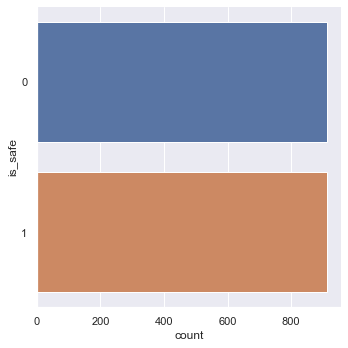

In [17]:
sb.catplot(y = 'is_safe', data = resampled, kind = "count")

The number of safe data and not safe data are now equal

In [18]:
# combine the data together again
OriginalDataForLDA=resampled_variable
OriginalDataForLDA["is_safe"]=resampled
OriginalDataForLDA

aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.99    15.70     0.07    2.57    0.060        2.16      0.81   
1          0.02     6.21     0.05    0.15    0.010        0.05      0.07   
2          1.97    17.23     0.04    2.68    0.006        3.65      0.20   
3          0.13    24.60     0.01    3.73    0.006        2.79      0.02   
4          0.07    21.65     0.28    2.07    0.060        5.23      0.08   
...         ...      ...      ...     ...      ...         ...       ...   
1819       0.05     7.78     0.00    1.95    0.040        0.10      0.03   
1820       0.05    24.22     0.02    0.59    0.010        0.45      0.02   
1821       0.09     6.85     0.00    0.61    0.030        0.05      0.05   
1822       0.01    10.00     0.01    2.00    0.000        2.00      0.00   
1823       0.04     6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  ...   lead  nitrates  nitrites  mercury  \
0       0.13      0.80      0.69  ...  0.104      9.24      1.72    0.004   
1       1.72      0.49      0.00  ...  0.093      7.62      1.41    0.009   
2       0.12      0.13      0.00  ...  0.049      6.06      1.77    0.002   
3       1.17      1.09      0.46  ...  0.089     13.08      1.52    0.004   
4       0.09      0.03      0.17  ...  0.067      5.58      1.75    0.001   
...      ...       ...       ...  ...    ...       ...       ...      ...   
1819    0.03      1.37      0.00  ...  0.197     14.29      1.00    0.005   
1820    0.02      1.48      0.00  ...  0.031     10.27      1.00    0.001   
1821    0.02      0.91      0.00  ...  0.182     15.92      1.00    0.000   
1822    0.09      0.00      0.00  ...  0.000      0.00      0.00    0.000   
1823    0.03      1.00      0.00  ...  0.182     15.92      1.00    0.000   

      perchlorate  radium  selenium  silver  uranium  is_safe  
0           39.59    3.40      0.09    0.26     0.05        0  
1            0.48    4.40      0.02    0.06     0.07        0  
2           45.83    4.64      0.04    0.05     0.02        0  
3           50.43    1.22      0.03    0.03     0.08        0  
4           24.18    2.73      0.03    0.19     0.00        0  
...           ...     ...       ...     ...      ...      ...  
1819         3.57    2.13      0.09    0.06     0.03        1  
1820         1.48    1.11      0.09    0.10     0.08        1  
1821         1.35    4.84      0.00    0.04     0.05        1  
1822         0.00    0.00      0.00    0.00     0.00        1  
1823         1.35    4.84      0.00    0.04     0.05        1  

[1824 rows x 21 columns]

In [19]:
DescribeFrame=Data.describe()
DescribeFrame

aluminium      ammonia      arsenic       barium      cadmium  \
count  7999.000000  7999.000000  7999.000000  7999.000000  7999.000000   
mean      0.666158    14.272857     0.161445     1.567715     0.042806   
std       1.265145     8.881569     0.252590     1.216091     0.036049   
min       0.000000    -0.080000     0.000000     0.000000     0.000000   
25%       0.040000     6.560000     0.030000     0.560000     0.008000   
50%       0.070000    14.130000     0.050000     1.190000     0.040000   
75%       0.280000    22.130000     0.100000     2.480000     0.070000   
max       5.050000    29.840000     1.050000     4.940000     0.130000   

        chloramine     chromium       copper     flouride     bacteria  \
count  7999.000000  7999.000000  7999.000000  7999.000000  7999.000000   
mean      2.176831     0.247226     0.805857     0.771565     0.319665   
std       2.567027     0.270640     0.653539     0.435373     0.329485   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.100000     0.050000     0.090000     0.405000     0.000000   
50%       0.530000     0.090000     0.750000     0.770000     0.220000   
75%       4.240000     0.440000     1.390000     1.160000     0.610000   
max       8.680000     0.900000     2.000000     1.500000     1.000000   

           viruses         lead     nitrates     nitrites      mercury  \
count  7999.000000  7999.000000  7999.000000  7999.000000  7999.000000   
mean      0.328583     0.099450     9.818822     1.329961     0.005194   
std       0.378096     0.058172     5.541331     0.573219     0.002967   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.002000     0.048000     5.000000     1.000000     0.003000   
50%       0.008000     0.102000     9.930000     1.420000     0.005000   
75%       0.700000     0.151000    14.610000     1.760000     0.008000   
max       1.000000     0.200000    19.830000     2.930000     0.010000   

       perchlorate       radium     selenium       silver      uranium  
count  7999.000000  7999.000000  7999.000000  7999.000000  7999.000000  
mean     16.460299     2.920548     0.049685     0.147781     0.044673  
std      17.687474     2.323009     0.028770     0.143551     0.026904  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       2.170000     0.820000     0.020000     0.040000     0.020000  
50%       7.740000     2.410000     0.050000     0.080000     0.050000  
75%      29.480000     4.670000     0.070000     0.240000     0.070000  
max      60.010000     7.990000     0.100000     0.500000     0.090000

We encode the data accordingly to save levels of each components

In [20]:
ColList=list(Data.columns)
print(ColList)
MaxCount=DescribeFrame.iloc[7]
Max_list =MaxCount.tolist()
print(Max_list)
print (result)

['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium', 'is_safe']
[5.05, 29.84, 1.05, 4.94, 0.13, 8.68, 0.9, 2.0, 1.5, 1.0, 1.0, 0.2, 19.83, 2.93, 0.01, 60.01, 7.99, 0.1, 0.5, 0.09]
['2.8', '32.5', '0.01', '2', '0.005', '4', '0.1', '1.3', '1.5', '0', '0', '0.015', '10', '1', '0.002', '56', '5', '0.5', '0.1', '0.3', '0', '1']


In [21]:
for j in range (19):
    if float(Max_list[j])<=float(result[j]):
        OriginalDataForLDA[str(ColList[j]+'_bin')]= pd.cut(Data.iloc[:,j],
                           [-0.001, float(result[j]), 100.00],
                           labels=['Safe', 'Dangerous'])
    else:
        OriginalDataForLDA[str(ColList[j]+'_bin')]= pd.cut(Data.iloc[:,j],
                           [-0.001, float(result[j]), float(Max_list[j])],
                           labels=['Safe', 'Dangerous'])

In [22]:
OriginalDataForLDA

aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.99    15.70     0.07    2.57    0.060        2.16      0.81   
1          0.02     6.21     0.05    0.15    0.010        0.05      0.07   
2          1.97    17.23     0.04    2.68    0.006        3.65      0.20   
3          0.13    24.60     0.01    3.73    0.006        2.79      0.02   
4          0.07    21.65     0.28    2.07    0.060        5.23      0.08   
...         ...      ...      ...     ...      ...         ...       ...   
1819       0.05     7.78     0.00    1.95    0.040        0.10      0.03   
1820       0.05    24.22     0.02    0.59    0.010        0.45      0.02   
1821       0.09     6.85     0.00    0.61    0.030        0.05      0.05   
1822       0.01    10.00     0.01    2.00    0.000        2.00      0.00   
1823       0.04     6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  ...  bacteria_bin  viruses_bin   lead_bin  \
0       0.13      0.80      0.69  ...     Dangerous         Safe  Dangerous   
1       1.72      0.49      0.00  ...     Dangerous    Dangerous  Dangerous   
2       0.12      0.13      0.00  ...     Dangerous    Dangerous  Dangerous   
3       1.17      1.09      0.46  ...     Dangerous    Dangerous  Dangerous   
4       0.09      0.03      0.17  ...     Dangerous    Dangerous  Dangerous   
...      ...       ...       ...  ...           ...          ...        ...   
1819    0.03      1.37      0.00  ...     Dangerous    Dangerous  Dangerous   
1820    0.02      1.48      0.00  ...     Dangerous    Dangerous  Dangerous   
1821    0.02      0.91      0.00  ...     Dangerous    Dangerous  Dangerous   
1822    0.09      0.00      0.00  ...     Dangerous    Dangerous  Dangerous   
1823    0.03      1.00      0.00  ...     Dangerous    Dangerous  Dangerous   

      nitrates_bin  nitrites_bin  mercury_bin  perchlorate_bin  radium_bin  \
0        Dangerous     Dangerous    Dangerous             Safe   Dangerous   
1             Safe     Dangerous    Dangerous             Safe        Safe   
2        Dangerous     Dangerous    Dangerous             Safe   Dangerous   
3             Safe     Dangerous    Dangerous             Safe        Safe   
4             Safe     Dangerous    Dangerous             Safe        Safe   
...            ...           ...          ...              ...         ...   
1819     Dangerous     Dangerous         Safe        Dangerous   Dangerous   
1820          Safe     Dangerous    Dangerous             Safe        Safe   
1821          Safe     Dangerous    Dangerous             Safe        Safe   
1822     Dangerous     Dangerous         Safe             Safe        Safe   
1823          Safe     Dangerous    Dangerous             Safe   Dangerous   

      selenium_bin  silver_bin  
0             Safe   Dangerous  
1             Safe   Dangerous  
2             Safe   Dangerous  
3             Safe   Dangerous  
4             Safe        Safe  
...            ...         ...  
1819          Safe   Dangerous  
1820          Safe   Dangerous  
1821          Safe   Dangerous  
1822          Safe   Dangerous  
1823          Safe        Safe  

[1824 rows x 40 columns]

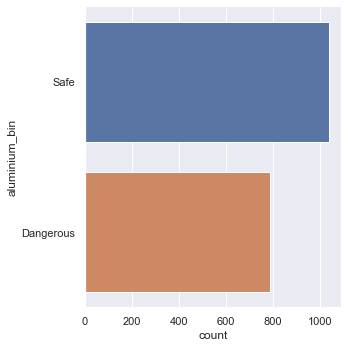

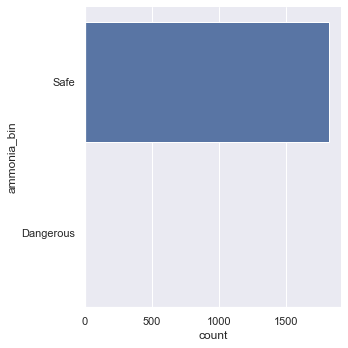

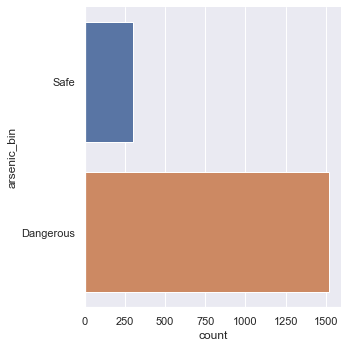

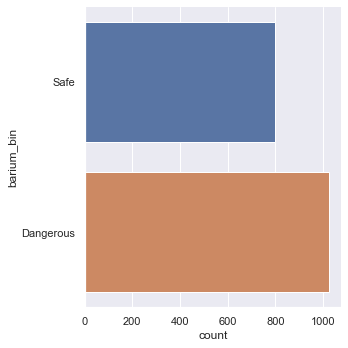

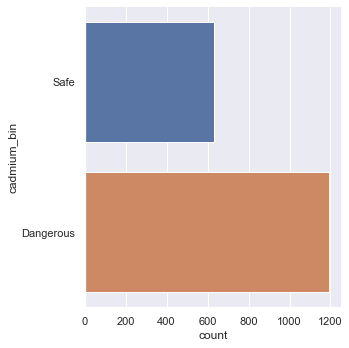

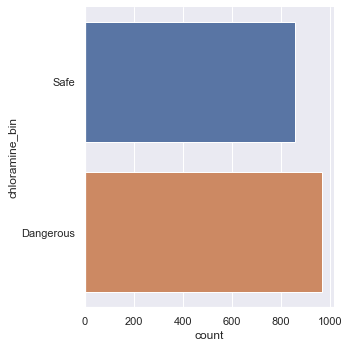

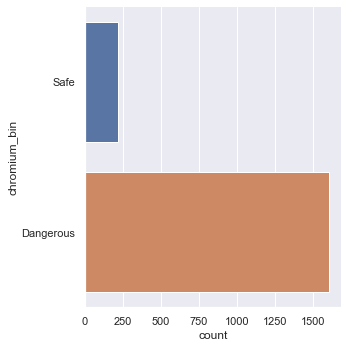

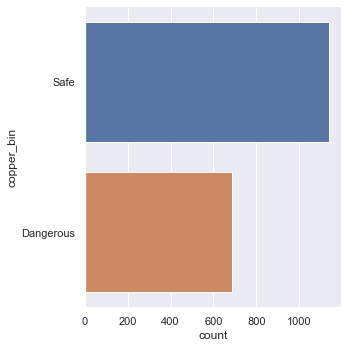

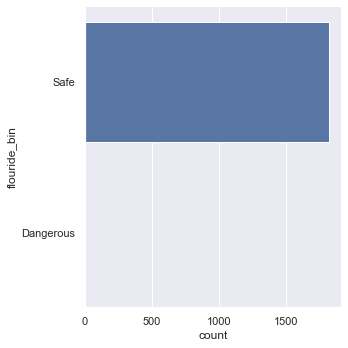

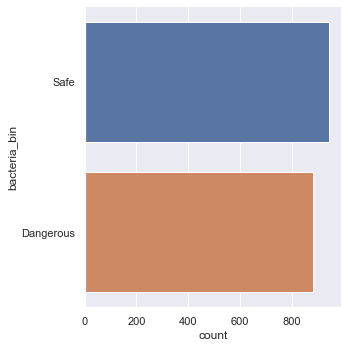

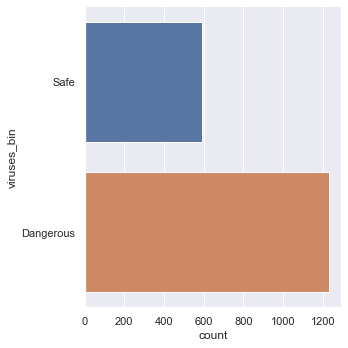

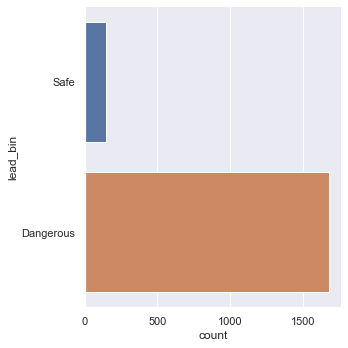

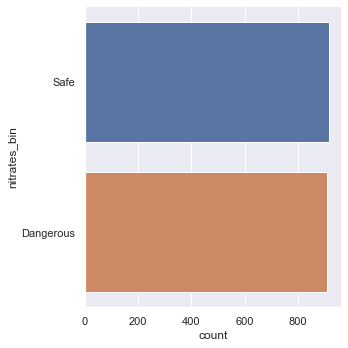

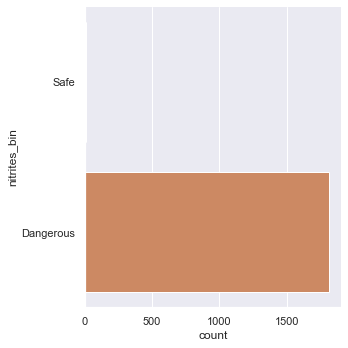

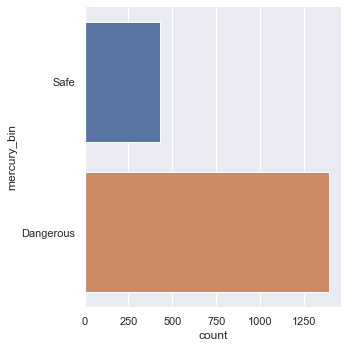

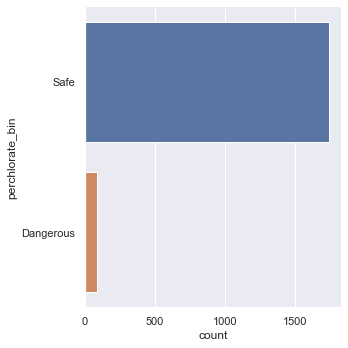

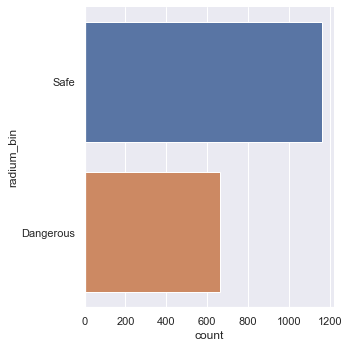

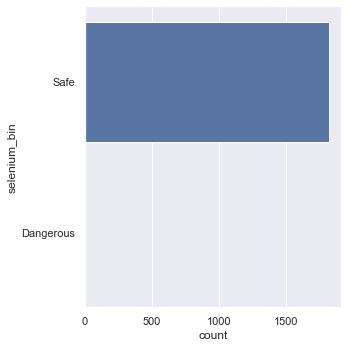

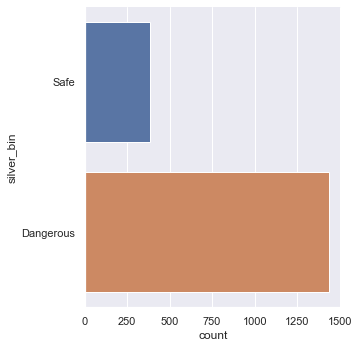

In [23]:
for y in OriginalDataForLDA.columns.values.tolist()[21:41]:
    sb.catplot(y = y, data = OriginalDataForLDA, kind = "count")

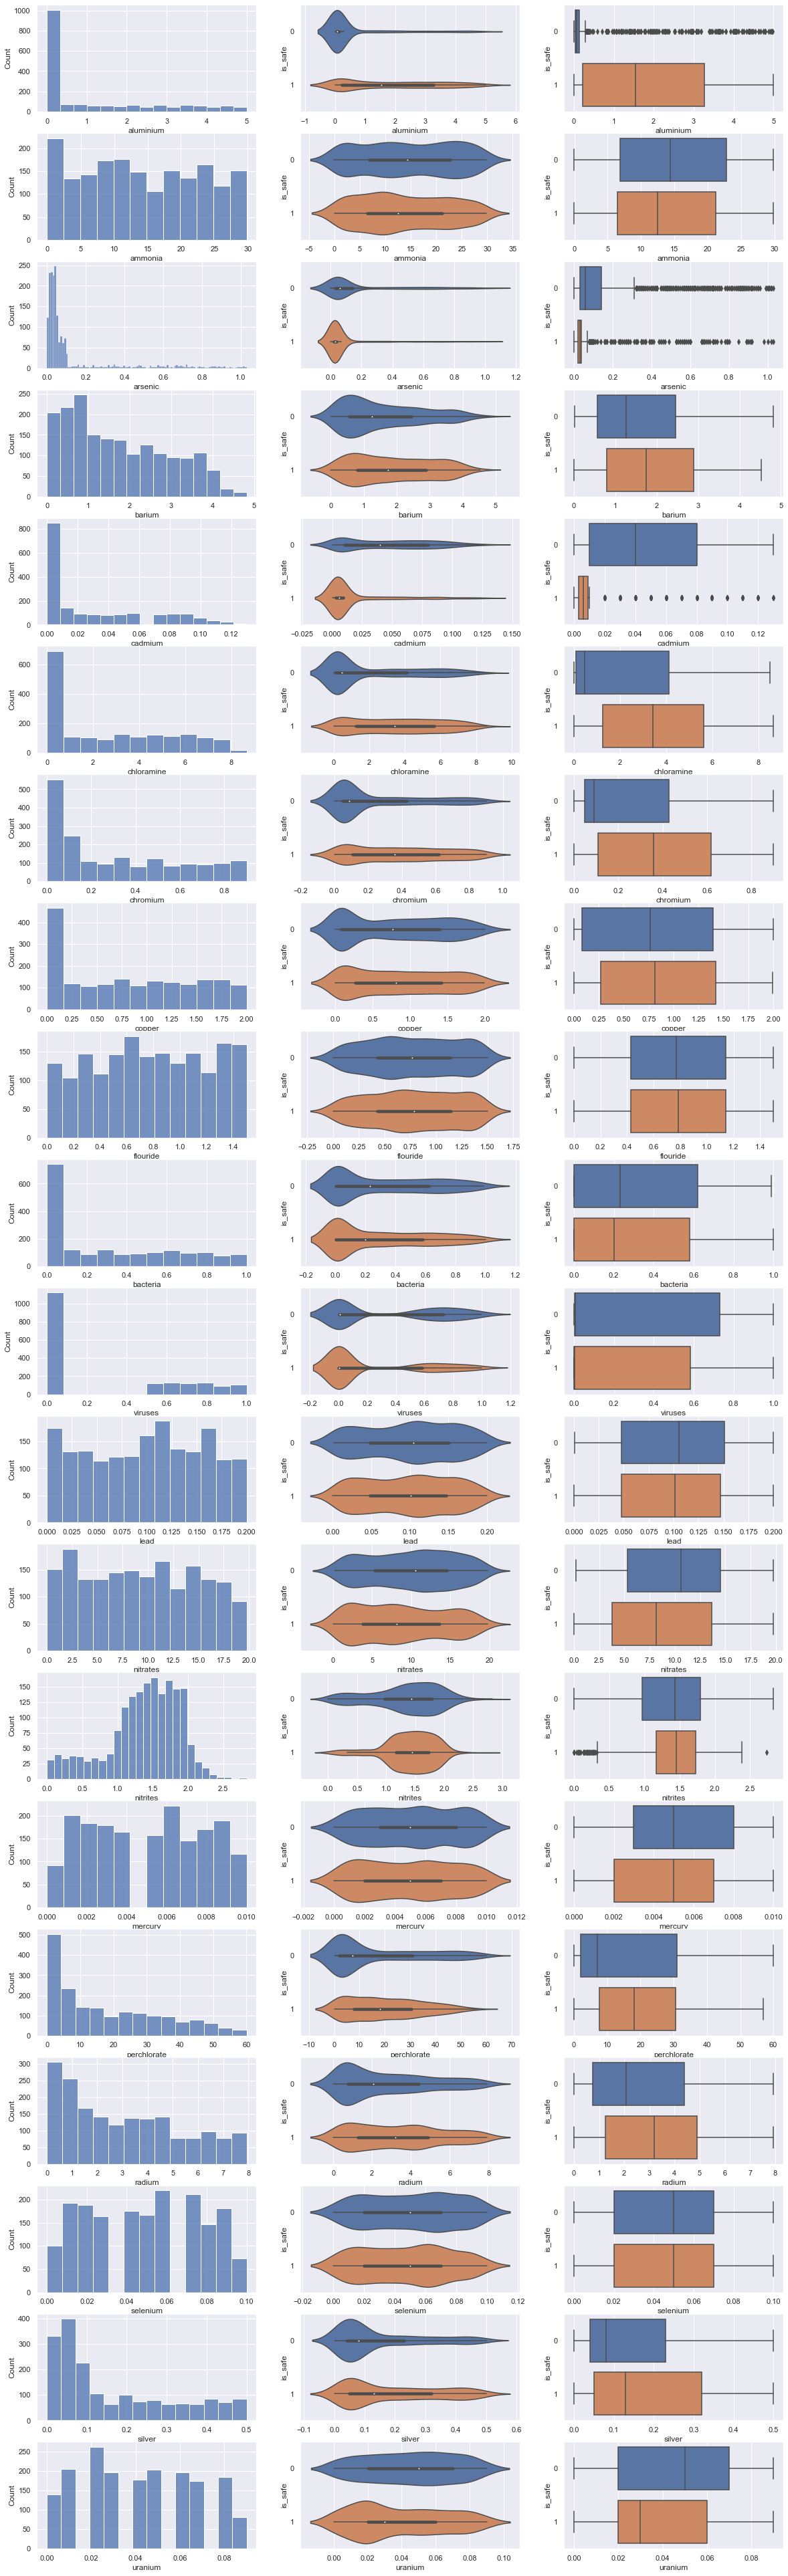

In [24]:
f, axes = plt.subplots(20, 3, figsize=(20, 70))
i=0
for y in OriginalDataForLDA.columns.values.tolist()[0:20]:
    
    sb.histplot(data = OriginalDataForLDA, x = y, ax=axes[i,0])
    sb.violinplot(data = OriginalDataForLDA,x=y,y='is_safe', ax = axes[i,1])
    sb.boxplot(data = OriginalDataForLDA, x=y,y='is_safe',orient = "h", ax = axes[i,2])
    i=i+1;

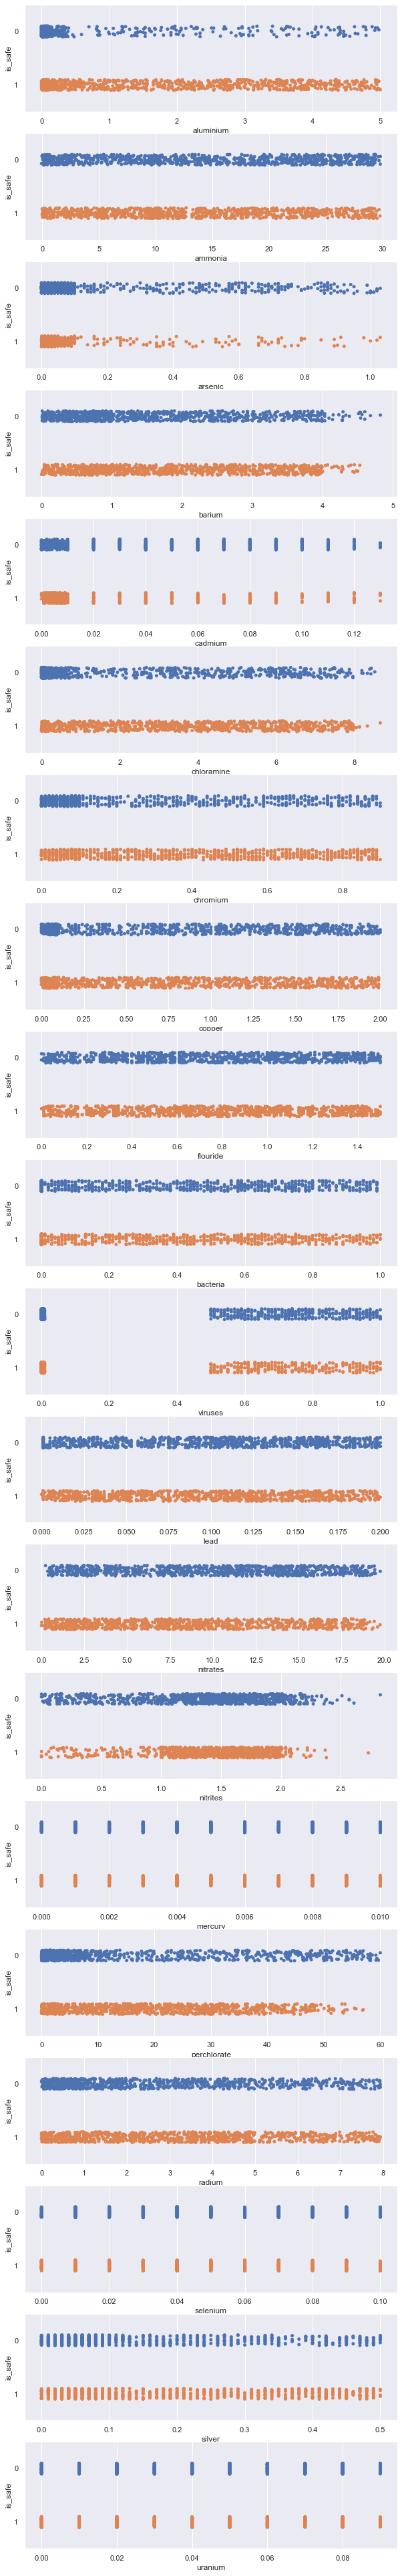

In [25]:
f, axes = plt.subplots(20, 1, figsize=(10, 70))
i=0
for j in OriginalDataForLDA.columns.values.tolist()[0:20]:
    sb.stripplot(x = j, y = 'is_safe', data = OriginalDataForLDA, ax=axes[i])
    i=i+1

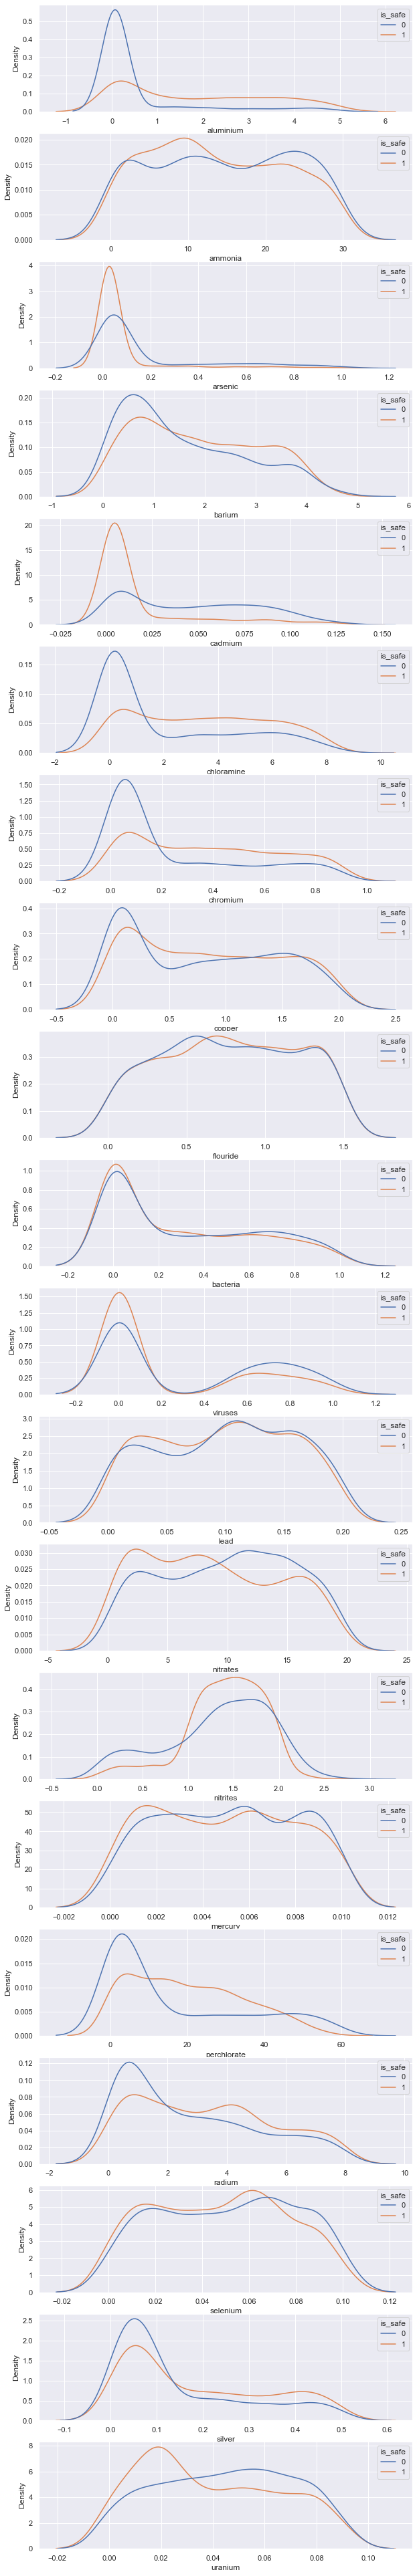

In [26]:
f, axes = plt.subplots(20, 1, figsize=(10, 70))
i=0
for j in OriginalDataForLDA.columns.values.tolist()[0:20]:
    sb.kdeplot(x = j, hue = 'is_safe', data = OriginalDataForLDA, ax=axes[i])
    i=i+1

### Correlation

In [27]:
OriginalDataForLDA['TypeInt']=(OriginalDataForLDA['is_safe']=='1').astype(int)
OriginalCorr=OriginalDataForLDA.corr()
OriginalCorrAbs=OriginalDataForLDA.corr().abs()
print(OriginalCorr)

             aluminium   ammonia   arsenic    barium   cadmium  chloramine  \
aluminium     1.000000  0.032422 -0.021437  0.257400 -0.294126    0.332619   
ammonia       0.032422  1.000000  0.083458  0.036246  0.018826    0.025738   
arsenic      -0.021437  0.083458  1.000000  0.229015  0.420161    0.193098   
barium        0.257400  0.036246  0.229015  1.000000 -0.070877    0.343415   
cadmium      -0.294126  0.018826  0.420161 -0.070877  1.000000   -0.228986   
chloramine    0.332619  0.025738  0.193098  0.343415 -0.228986    1.000000   
chromium      0.334780  0.074372  0.161941  0.285090 -0.215775    0.434256   
copper        0.193664  0.019369 -0.125431  0.064602 -0.198806    0.154878   
flouride     -0.020875 -0.022413 -0.004470 -0.014218  0.018384    0.021223   
bacteria     -0.005157  0.072606  0.065641  0.113960 -0.070667    0.173672   
viruses      -0.063541  0.069123  0.061110  0.032482  0.050157    0.043101   
lead          0.041899 -0.062910 -0.096294  0.006389 -0.072507  

In [28]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder() 

# Encode categorical values
Data['Safety Encode']=enc.fit_transform(Data[['is_safe']])

# Check encoding results in a crosstab
pd.crosstab(Data['is_safe'], Data['Safety Encode'], margins=False)

Safety Encode  0.0   1.0  2.0
is_safe                      
#NUM!            3     0    0
0                0  7084    0
1                0     0  912

<AxesSubplot:>

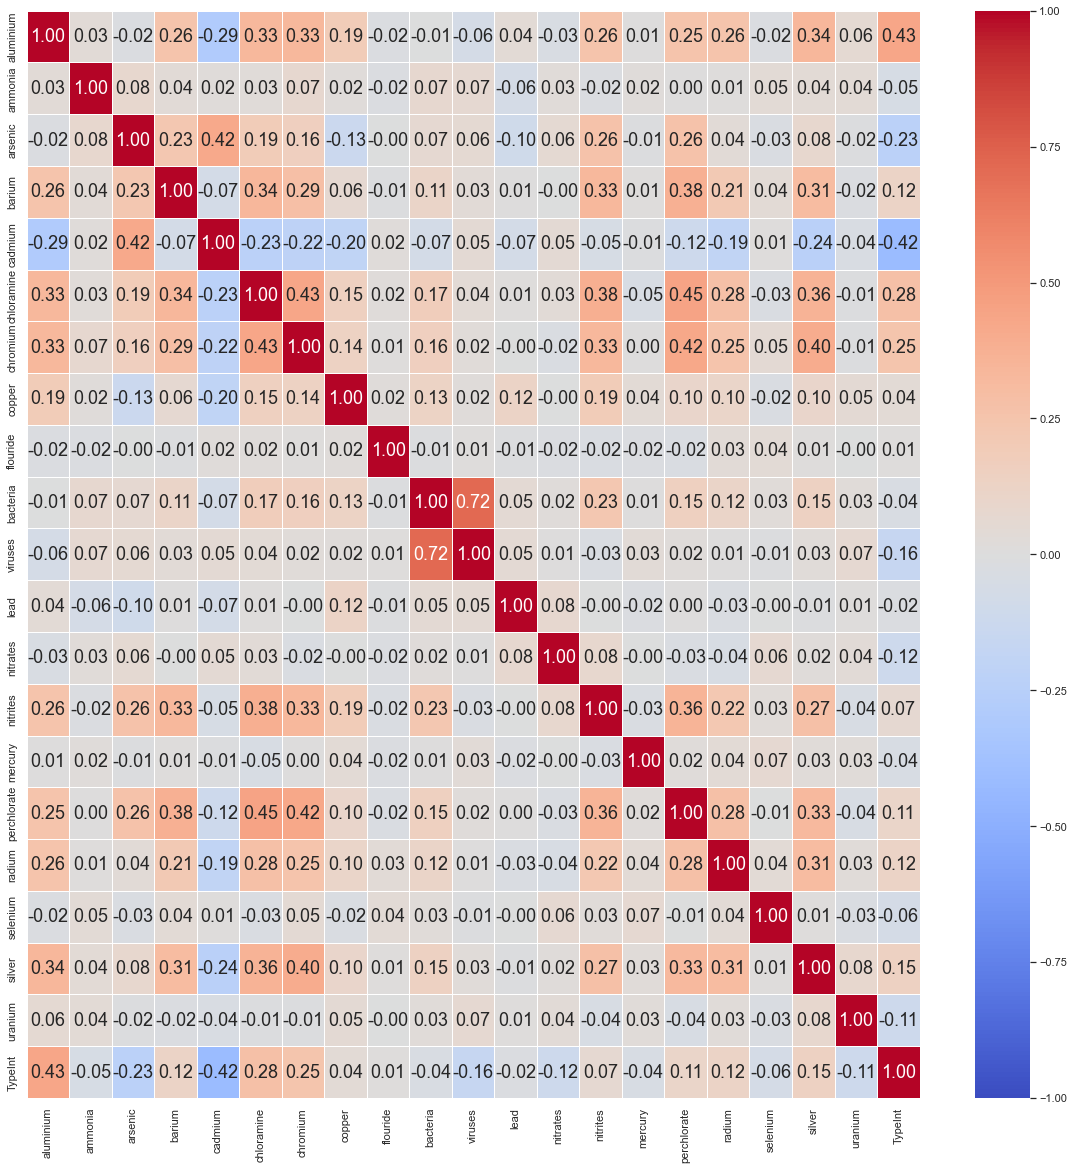

In [29]:
f = plt.figure(figsize=(20, 20))
sb.heatmap(OriginalDataForLDA.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "coolwarm")

In [30]:
CorrWrtSafe=pd.DataFrame(OriginalCorrAbs['TypeInt'])
CorrWrtSafe

TypeInt
aluminium    0.433762
ammonia      0.050474
arsenic      0.230582
barium       0.120226
cadmium      0.418059
chloramine   0.277924
chromium     0.245199
copper       0.043481
flouride     0.009871
bacteria     0.038211
viruses      0.161593
lead         0.022669
nitrates     0.115696
nitrites     0.070310
mercury      0.042671
perchlorate  0.106041
radium       0.124802
selenium     0.064449
silver       0.146697
uranium      0.113197
TypeInt      1.000000

In [31]:
CorrWrtSafe[['TypeInt']].sort_values(['TypeInt'], ascending=False).head(4)

TypeInt
TypeInt     1.000000
aluminium   0.433762
cadmium     0.418059
chloramine  0.277924

In [32]:
import plotly.express as px # for data visualization

# Skleran
from sklearn.preprocessing import StandardScaler # for data standardization
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.tree import DecisionTreeClassifier # for decision tree models

# Sklearn dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # for LDA analysis
from sklearn.decomposition import PCA # for PCA analysis


In [33]:
fig = px.scatter_3d(OriginalDataForLDA, 
                    x=OriginalDataForLDA['aluminium'], y=OriginalDataForLDA['cadmium'], z=OriginalDataForLDA['chloramine'],
                    color=OriginalDataForLDA['is_safe'],
                    color_discrete_sequence=['#636EFA','#EF553B','#00CC96'], 
                    hover_data=['chloramine','aluminium', 'cadmium','is_safe'],
                    height=900, width=900
                   )

# Update chart looks
fig.update_layout(#title_text="Scatter 3D Plot",
                  showlegend=True,
                  legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.2),
                                        eye=dict(x=-1.5, y=1.5, z=0.5)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         )))

# Update marker size
fig.update_traces(marker=dict(size=2))

fig.show()

All variables

In [34]:
# Select features
X=OriginalDataForLDA. iloc[:, 0:19]
# Select target
y=OriginalDataForLDA['is_safe'].astype('category')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
# Get scaler
scaler=StandardScaler()
# Perform standard scaling on model features
X_std_train=scaler.fit_transform(X_train)

In [35]:
# Select the model and its parameters
pca = PCA(n_components=2) # reducing from 3 dimensions to 2

# Fit the model
X_trans_pca_train=pca.fit_transform(X_std_train)

# Print the results
print('*************** PCA Summary ***************')
print('No. of features: ', pca.n_features_)
print('No. of samples: ', pca.n_samples_)
print('No. of components: ', pca.n_components_)
print('Explained variance ratio: ', pca.explained_variance_ratio_)

*************** PCA Summary ***************
No. of features:  19
No. of samples:  1368
No. of components:  2
Explained variance ratio:  [0.18766018 0.09283964]


In [36]:
# Create a scatter plot
fig = px.scatter(OriginalDataForLDA, x=X_trans_pca_train[:,0], y=X_trans_pca_train[:,1], 
                 labels={
                     "x": "PC1",
                     "y": "PC2",
                     "color" : "is_safe"
                 },
                 opacity=1, color=y_train)

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title_text="PCA scatter plot")

# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

In [37]:
pca = PCA(n_components=2)                       

# Fit the model
X_trans_pca_train=pca.fit_transform(X_std_train)

# Print the results
print('*************** PCA Summary ***************')
print('No. of features: ', pca.n_features_)
print('No. of samples: ', pca.n_samples_)
print('No. of components: ', pca.n_components_)
print('Explained variance ratio: ', pca.explained_variance_ratio_)

*************** PCA Summary ***************
No. of features:  19
No. of samples:  1368
No. of components:  2
Explained variance ratio:  [0.1876604 0.0928187]


In [38]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_trans_pca_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_trans_pca_train)


print("Goodness of Fit of Model for PCA with ALL variables \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_trans_pca_train, y_train))
print()
print("RECALL==TRUE POSITIVE RATE")

print(classification_report(y_train, y_train_pred))

Goodness of Fit of Model for PCA with ALL variables 	Train Dataset
Classification Accuracy 	: 0.7587719298245614

RECALL==TRUE POSITIVE RATE
              precision    recall  f1-score   support

           0       0.85      0.61      0.71       664
           1       0.71      0.90      0.79       704

    accuracy                           0.76      1368
   macro avg       0.78      0.75      0.75      1368
weighted avg       0.78      0.76      0.75      1368



In [39]:
##LDA##

In [40]:
lda = LDA(
    solver='eigen', #{‘svd’, ‘lsqr’, ‘eigen’}, default=’svd’
    n_components=1, #int, default=None
    #shrinkage=None, #‘auto’ or float, default=None
    #priors=None, #array-like of shape (n_classes,), default=None, The class prior probabilities. By default, the class proportions are inferred from the training data.
    #store_covariance=False, #bool, default=False, If True, explicitely compute the weighted within-class covariance matrix when solver is ‘svd’. 
    #tol=0.0001, #float, default=1.0e-4, Absolute threshold for a singular value of X to be considered significant, used to estimate the rank of X.
)

# Fit transform the data
X_trans_lda_train=lda.fit_transform(X_std_train,y_train)

# Print the results
print('*************** LDA Summary ***************')
print('Classes: ', lda.classes_)
print('Priors: ', lda.priors_)
print('Explained variance ratio: ', lda.explained_variance_ratio_)

*************** LDA Summary ***************
Classes:  ['0' '1']
Priors:  [0.48538012 0.51461988]
Explained variance ratio:  [1.]


In [41]:
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_trans_lda_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_trans_lda_train)

print()
print("--------------------------------------------------------------------------")
print()

print("Goodness of Fit of Model for LDA with 3 Variables \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_trans_lda_train, y_train))
print()
print("RECALL==TRUE POSITIVE RATE")


print(classification_report(y_train, y_train_pred))


--------------------------------------------------------------------------

Goodness of Fit of Model for LDA with 3 Variables 	Train Dataset
Classification Accuracy 	: 0.8004385964912281

RECALL==TRUE POSITIVE RATE
              precision    recall  f1-score   support

           0       0.82      0.75      0.79       664
           1       0.78      0.85      0.81       704

    accuracy                           0.80      1368
   macro avg       0.80      0.80      0.80      1368
weighted avg       0.80      0.80      0.80      1368



<AxesSubplot:>

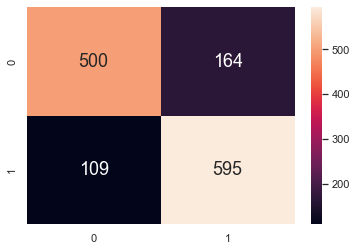

In [44]:
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})